In [73]:
import pandas as pd
import os
import requests
import numpy as np
import matplotlib.pyplot as pp
import sqlite3
from sqlite3 import Error
import matplotlib.pyplot as plt

In [4]:
#set the keys
foursquare_api_key = os.environ["FOURSQUARE_API_KEY"]
yelp_client_id = os.environ["YELP_CLIENT_ID"]
yelp_api_key = os.environ["YELP_API_KEY"]
google_api_key = os.environ["GOOGLE_API_KEY"]

In [5]:
# Parameters

# Radius
#radius = '1200' 
radius = '300'

# Location: Calgary downtown
#latitude = '51.045897' 
#longitude = '-114.071469' 
#ll = '51.045897,-114.071469'

# latitude = '51.047240' 
# longitude = '-114.088753' 
# ll = '51.047240,-114.088753'

# latitude = '51.050488' 
# longitude = '-114.079943' 
# ll = '51.050488,-114.079943'


# latitude = '51.052825' 
# longitude = '-114.073763' 
# ll = '51.052825,-114.073763'


# latitude = '51.050791' 
# longitude = '-114.073867' 
# ll = '51.050791,-114.073867'


# latitude = '51.052770' 
# longitude = '-114.069533' 
# ll = '51.052770,-114.069533'


# latitude = '51.049691' 
# longitude = '-114.069662' 
# ll = '51.049691,-114.069662'


# latitude = '51.046335' 
# longitude = '-114.069877' 
# ll = '51.046335,-114.069877'


# latitude = '51.050466' 
# longitude = '-114.062667' 
# ll = '51.050466,-114.062667'



# latitude = '51.047906' 
# longitude = '-114.063096' 
# ll = '51.047906,-114.063096'


# latitude = '51.045434' 
# longitude = '-114.063075' 
# ll = '51.045434,-114.063075'


# latitude = '51.048864' 
# longitude = '-114.057410' 
# ll = '51.048864,-114.057410'


# latitude = '51.046264' 
# longitude = '-114.057453' 
# ll = '51.046264,-114.057453'



# latitude = '51.048358' 
# longitude = '-114.053290' 
# ll = '51.048358,-114.053290'


# latitude = '51.046216' 
# longitude = '-114.053075' 
# ll = '51.046216,-114.053075'



# latitude = '51.047130' 
# longitude = '-114.050157' 
# ll = '51.047130,-114.050157'


# latitude = '51.045346' 
# longitude = '-114.050178' 
# ll = '51.045346,-114.050178'


latitude = '51.045940' 
longitude = '-114.046777' 
ll = '51.045940,-114.046777'




# Selected POIs 
# 1. Restaurant, 2. Bar
categories = [{'foursquare':'13065', 'yelp': 'restaurants', 'google': 'restaurant', 'poi_system': 'restaurants'},
              {'foursquare':'13003', 'yelp': 'bars', 'google': 'bars', 'poi_system': 'bars'},
              {'foursquare':'18021', 'yelp': 'gyms', 'google': 'gyms', 'poi_system': 'gyms'},
              {'foursquare':'19020', 'yelp': 'parking', 'google': 'parkings', 'poi_system': 'parking'},
              {'foursquare':'15000', 'yelp': 'health', 'google': 'health', 'poi_system': 'health'},
              {'foursquare':'17018', 'yelp': 'bookstores', 'google': 'book_stores', 'poi_system': 'bookstores'},
              {'foursquare':'11045', 'yelp': 'banks', 'google': 'banks', 'poi_system': 'banks'},
              {'foursquare':'19042', 'yelp': 'busstations', 'google': 'bus_stations', 'poi_system': 'busstations'},
              {'foursquare':'13034', 'yelp': 'Cafes', 'google': 'cafes', 'poi_system': 'cafes'},
              {'foursquare':'10024', 'yelp': 'Cinema', 'google': 'movie_theaters', 'poi_system': 'cinemas'}
             ]

# 10 POIs selected for comparasion
# Restaurant
# Bar
# Gym
# Parking
# Health
# Bookstore
# Bank
# Bus Station
# Cafe
# Cinema


# (1) Compare searching critiria
# (2) Compare number of column returned
# (3) Compare the number of records
# (4) Compare the usage from the programmer of view

## SQLite Database 

### Table1: poi_info

api,
poi_id,
name,
address,
province,
city,
country,
postcode,
timezone,
latitude,
longitude,
phone,
fax,
email,
social_media,
is_closed,
url,
image_url,
review_count,
rating,
price,
price_level,



### Table2: poi_category

api,
poi_id,
category,



### Table3: poi_opening_hours

api,
poi_id,
day,
open_time,
close_time,


### Table4: poi_hours_popular

api,
poi_id,
day,
open_time,
close_time,


### Table5: poi_related_places

api,
poi_id,
related_poi_id,
name,


### Table6: poi_reviews

api,
poi_id,
author_name,
rating,
time,
text




In [6]:
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")
        
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

In [7]:
connection = create_connection("place_api.sqlite")

Connection to SQLite DB successful


## Create the tables for the database

In [240]:
# 1. CREATE poi_info table

#drop_poi_info = "DROP TABLE poi_info;"
#execute_query(connection, drop_poi_info)  

create_poi_into_table = """
CREATE TABLE IF NOT EXISTS poi_info (
    api TEXT NOT NULL,
    poi_id TEXT NOT NULL,
    name TEXT NOT NULL,
    address TEXT,
    province TEXT,
    city TEXT,
    country TEXT,
    postcode TEXT,
    timezone TEXT,
    latitude REAL,
    longitude REAL,
    phone TEXT,
    fax TEXT,
    email TEXT,
    social_media TEXT,
    is_closed TEXT,
    url TEXT,
    image_url TEXT,
    review_count INTEGER,
    rating REAL,
    price_level TEXT,
    PRIMARY KEY (api, poi_id)
);
"""

execute_query(connection, create_poi_into_table)  

Query executed successfully
Query executed successfully


---------------

In [88]:
# 2. CREATE poi_category table

#drop_poi_category = "DROP TABLE poi_category;"
#execute_query(connection, drop_poi_category)  

create_poi_category_table = """
CREATE TABLE IF NOT EXISTS poi_category (
    api TEXT NOT NULL,
    poi_id TEXT NOT NULL,
    category TEXT NOT NULL ,
    PRIMARY KEY (api, poi_id, category)
    FOREIGN KEY (api, poi_id) REFERENCES poi_info(api, poi_id)
);
"""

execute_query(connection, create_poi_category_table)  

Query executed successfully
Query executed successfully


---------------

In [89]:
# 3. CREATE poi_opening_hours table

#drop_poi_opening_hours = "DROP TABLE poi_opening_hours;"
#execute_query(connection, drop_poi_opening_hours)  

create_poi_opening_hours_table = """
CREATE TABLE IF NOT EXISTS poi_opening_hours (
    api TEXT NOT NULL,
    poi_id TEXT NOT NULL,
    day INTEGER NOT NULL,
    open_time INTEGER,
    close_time INTEGER,
    PRIMARY KEY (api, poi_id, day)
    FOREIGN KEY (api, poi_id) REFERENCES poi_info(api, poi_id)
);
"""

execute_query(connection, create_poi_opening_hours_table)  

Query executed successfully


---------------

In [90]:
# 4. CREATE poi_hours_popular table

#drop_poi_hours_popular = "DROP TABLE poi_hours_popular;"
#execute_query(connection, drop_poi_hours_popular)  

create_poi_hours_popular_table = """
CREATE TABLE IF NOT EXISTS poi_hours_popular (
    api TEXT NOT NULL,
    poi_id TEXT NOT NULL,
    day INTEGER NOT NULL,
    open_time INTEGER NOT NULL,
    close_time INTEGER,
    PRIMARY KEY (api, poi_id, day, open_time)
    FOREIGN KEY (api, poi_id) REFERENCES poi_info(api, poi_id)
);
"""

execute_query(connection, create_poi_hours_popular_table)  

Query executed successfully


---------------

In [94]:
# 5. CREATE poi_related_places table

#drop_poi_related_places = "DROP TABLE poi_related_places;"
#execute_query(connection, drop_poi_related_places)  

create_poi_related_places_table = """
CREATE TABLE IF NOT EXISTS poi_related_places (
    api TEXT NOT NULL,
    poi_id TEXT NOT NULL,
    related_poi_id TEXT NOT NULL,
    name TEXT,
    PRIMARY KEY (api, poi_id, related_poi_id)
    FOREIGN KEY (api, poi_id) REFERENCES poi_info(api, poi_id)
);
"""

execute_query(connection, create_poi_related_places_table)  

Query executed successfully
Query executed successfully


---------------

In [124]:
# 6. CREATE poi_reviews table

#drop_poi_reviews = "DROP TABLE poi_reviews;"
#execute_query(connection, drop_poi_reviews)  

create_poi_reviews_table = """
CREATE TABLE IF NOT EXISTS poi_reviews (
    api TEXT NOT NULL,
    poi_id TEXT NOT NULL,
    author_name TEXT,
    rating REAL,
    time TEXT,
    text TEXT,
    FOREIGN KEY (api, poi_id) REFERENCES poi_info(api, poi_id)
);
"""

execute_query(connection, create_poi_reviews_table)  

Query executed successfully
Query executed successfully


---------------

## Functions to insert records

In [13]:
def insert_poi_info_reccord(connection, record):
    insert_poi_info = """
    INSERT INTO
        poi_info (api, poi_id, name, address, province, city, country, postcode, timezone, latitude, longitude, phone, fax, email, social_media, is_closed, url, image_url, review_count, rating, price_level)
    VALUES
        (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?);
    """
    
    cursor = connection.cursor()
    try:
        cursor.execute(insert_poi_info, record)
        connection.commit()
        #print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")
    
    #execute_query(connection, create_users)  

In [ ]:
#insert record testing
#record =  ('foursquare', '001', 'test', 'address1', 'AB', 'Calgary', 'Canada', 'T3D1S9', 'Edmonton', 51.045897, -114.071469, '234233', '23423423', 'fads@fdfsd.com', 'facebook, twiter', 'False', 'http://testing.com', 'http://testing.com/pic.png', 1232, 3.8, 87.5, 3)
#insert_poi_info_reccord(connection, record)

---------------

In [14]:
def insert_poi_category_record(connection, record):
    insert_poi_category = """
    INSERT INTO
        poi_category (api, poi_id, category)
    VALUES
        (?,?,?);
    """
    
    cursor = connection.cursor()
    try:
        cursor.execute(insert_poi_category, record)
        connection.commit()
        #print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

In [110]:
#insert record testing
# record =  ('foursquare', '001', 'restaurants')
# insert_poi_category_record(connection, record)

---------------

In [15]:
def insert_poi_opening_hours_record(connection, record):
    insert_poi_opening_hours = """
    INSERT INTO
        poi_opening_hours (api, poi_id, day, open_time, close_time)
    VALUES
        (?,?,?,?,?);
    """
    
    cursor = connection.cursor()
    try:
        cursor.execute(insert_poi_opening_hours, record)
        connection.commit()
        #print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

In [137]:
#insert record testing
# record =  ('foursquare', '001', 1, 1000, 2100)
# insert_poi_opening_hours_record(connection, record)

---------------

In [16]:
def insert_poi_hours_popular_record(connection, record):
    insert_poi_hours_popular = """
    INSERT INTO
        poi_hours_popular (api, poi_id, day, open_time, close_time)
    VALUES
        (?,?,?,?,?);
    """
    
    cursor = connection.cursor()
    try:
        cursor.execute(insert_poi_hours_popular, record)
        connection.commit()
        #print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

In [136]:
#insert record testing
# record =  ('foursquare', '001', 1, 1700, 2000)
# insert_poi_hours_popular_record(connection, record)

---------------

In [17]:
def insert_poi_related_places_record(connection, record):
    insert_poi_related_places = """
    INSERT INTO
        poi_related_places (api, poi_id, related_poi_id, name)
    VALUES
        (?,?,?,?);
    """
    
    cursor = connection.cursor()
    try:
        cursor.execute(insert_poi_related_places, record)
        connection.commit()
        #print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

In [135]:
#insert record testing
# record =  ('foursquare', '001', '002', 'test2')
# insert_poi_related_places_record(connection, record)

---------------

In [18]:
def insert_poi_reviews_record(connection, record):
    insert_poi_reviews = """
    INSERT INTO
        poi_reviews (api, poi_id, author_name, rating, time, text)
    VALUES
        (?,?,?,?,?,?);
    """
    
    cursor = connection.cursor()
    try:
        cursor.execute(insert_poi_reviews, record)
        connection.commit()
        #print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

In [134]:
#insert record testing
#record =  ('foursquare', '001', 'author1', 4.2, '18-01-2022 10:45', 'Good place')
#insert_poi_reviews_record(connection, record)

---------------

## Foursquare API

In [70]:
def get_foursquare_place(ll, radius, categories):
    url = 'https://api.foursquare.com/v3/places/search?'
    url = url + 'll='+ll
    url = url + '&radius='+radius
    url = url + '&categories='+categories
    url = url + '&fields=fsq_id,name,geocodes,location,categories,related_places,timezone,description,tel,fax,email,website,social_media,hours,hours_popular,rating,stats,popularity,price,menu,photos,tips,tastes'
    url = url + '&limit=50'

    headers = {
        'Accept': 'application/json',
        'Authorization': foursquare_api_key
    }

    res = requests.request("GET", url, headers=headers)

    return res.json()

In [71]:
def collect_foursquare_place(categories):
    for category in categories:
        result = get_foursquare_place(ll, radius, category['foursquare'])

        for i in result['results']:
            record = ['foursquare']
            record.append(i['fsq_id'])
            record.append(i['name'])
            record.append(i['location']['formatted_address'])
            record.append(i['location']['region'])
            record.append(i['location']['locality'])
            record.append(i['location']['country'])
            record.append(i['location']['postcode'] if 'postcode' in i['location'] else '')
            record.append(i['timezone'] if 'timezone' in i else '')
            record.append(float(i['geocodes']['main']['latitude']))
            record.append(float(i['geocodes']['main']['longitude']))
            record.append(i['tel'] if 'tel' in i else '')
            record.append('')
            record.append(i['email'] if 'email' in i else '')
            record.append(str(i['social_media'] if 'social_media' in i else '') )
            record.append('False' if i['hours']['open_now'] else 'True')
            record.append(i['website'] if 'website' in i else '')
            record.append('')
            if 'stats' in i:
                if 'total_ratings' in i['stats']:
                    record.append(i['stats']['total_ratings'])
                else:
                    record.append('')
            else:
                record.append('')
            record.append(i['rating'] if 'rating' in i else '')
            record.append(i['price'] if 'price' in i else '')

            insert_poi_info_reccord(connection, tuple(record))



            record = ('foursquare', i['fsq_id'], category['poi_system'])
            insert_poi_category_record(connection, record)



            if 'hours' in i:
                if 'regular' in i['hours']:
                    for h in i['hours']['regular']:
                        record = ('foursquare', i['fsq_id'], h['day'], int(h['open']), int(h['close']))
                        insert_poi_opening_hours_record(connection, record)

categories

            if 'hours_popular' in i:
                for h in i['hours_popular']:
                    record = ('foursquare', i['fsq_id'], h['day'], int(h['open']), int(h['close']))
                    insert_poi_hours_popular_record(connection, record)


            if 'parent' in i['related_places']:
                record = ('foursquare', i['fsq_id'], i['related_places']['parent']['fsq_id'], i['related_places']['parent']['name'])
                insert_poi_related_places_record(connection, record)


            for t in i['tips']:
                record = ('foursquare', i['fsq_id'], '', '', t['created_at'], t['text'])
                insert_poi_reviews_record(connection, record)

In [ ]:
collect_foursquare_place(categories)

## YELP API

In [75]:
def get_yelp_business(latitude, longitude, radius, categories):
    url = 'https://api.yelp.com/v3/businesses/search?'
    url = url + 'categories=' + categories
    url = url + '&latitude=' + latitude
    url = url + '&longitude=' + longitude
    url = url + '&radius=' + radius
    url = url + '&limit=50'

    headers = {
        'Accept': 'application/json',
        'Authorization': 'Bearer %s' % yelp_api_key
    }

    res = requests.request("GET", url, headers=headers)

    return res.json()

def get_yelp_business_details(yelp_id):
    url = 'https://api.yelp.com/v3/businesses/'
    url = url + yelp_id
    
    headers = {
        'Accept': 'application/json',
        'Authorization': 'Bearer %s' % yelp_api_key
    }

    res = requests.request("GET", url, headers=headers)

    return res.json()


def get_yelp_reviews(yelp_id):
    url = 'https://api.yelp.com/v3/businesses/'
    url = url + yelp_id + '/reviews'
    
    headers = {
        'Accept': 'application/json',
        'Authorization': 'Bearer %s' % yelp_api_key
    }

    res = requests.request("GET", url, headers=headers)

    return res.json()

#result = get_yelp_business(latitude, longitude, radius, categories[0]['yelp'])
#yresult = get_yelp_business_details(result['businesses'][0]['id'])

In [78]:
def collect_yelp_business(categories):
    for category in categories:
        resultid = get_yelp_business(latitude, longitude, radius, category['yelp'])
        
        for result in resultid['businesses']:
            i = get_yelp_business_details(result['id'])
            
            record = ['yelp']
            record.append(i['id'] if 'id' in i else result['id'])
            record.append(i['name'])
            record.append(str(i['location']['display_address']))
            record.append(i['location']['state'])
            record.append(i['location']['city'])
            record.append(i['location']['country'])
            record.append(i['location']['zip_code'])
            record.append('')
            record.append(float(i['coordinates']['latitude']))
            record.append(float(i['coordinates']['longitude']))
            record.append(i['phone'] if 'phone' in i else '')
            record.append('')
            record.append(i['email'] if 'email' in i else '')
            record.append('')
            record.append(str(i['is_closed']) if 'is_closed' in i else 'True')
            record.append(i['url'] if 'url' in i else '')
            record.append(i['image_url'] if 'image_url' in i else '')
            record.append(i['review_count'] if 'review_count' in i else '')
            record.append(i['rating'] if 'rating' in i else '')
            record.append(i['price'] if 'price' in i else '')
            
            insert_poi_info_reccord(connection, tuple(record))
            
            
            record = ('yelp', i['id'], category['poi_system'])
            insert_poi_category_record(connection, record)


            if 'hours' in i:
                if 'open' in i['hours'][0]:
                    for h in i['hours'][0]['open']:
                        record = ('yelp', i['id'], h['day'], int(h['start']), int(h['end']))
                        insert_poi_opening_hours_record(connection, record)

                        
            review = get_yelp_reviews(result['id'])
            for t in review['reviews']:
                record = ('yelp', i['id'], '', t['rating'], t['time_created'], t['text'])
                insert_poi_reviews_record(connection, record)

In [ ]:
collect_yelp_business(categories)

## Google API

In [149]:
def get_google_place(ll, radius, categories):
    url = 'https://maps.googleapis.com/maps/api/place/nearbysearch/json?'
    #url = url + 'keyword=cruise'
    url = url + 'keyword=' + categories
    url = url + '&location=' + ll
    url = url + '&radius=' + radius
    url = url + '&type=' + categories
    url = url + '&key=' + google_api_key

    payload = {}
    headers = {}

    res = requests.request("GET", url, headers=headers, data=payload)

    return res.json()

def get_google_place_next_page(ll, radius, categories, pagetoken):
    url = 'https://maps.googleapis.com/maps/api/place/nearbysearch/json?'
    url = url + 'keyword=' + categories
    url = url + '&location=' + ll
    url = url + '&radius=' + radius
    url = url + '&type=' + categories
    url = url + '&pagetoken=' + pagetoken
    url = url + '&key=' + google_api_key

    payload = {}
    headers = {}

    res = requests.request("GET", url, headers=headers, data=payload)

    return res.json()

def get_google_place_details(google_place_id):
    url = 'https://maps.googleapis.com/maps/api/place/details/json?'
    url = url + 'place_id=' + google_place_id
    url = url + '&key=' + google_api_key

    payload = {}
    headers = {}

    res = requests.request("GET", url, headers=headers, data=payload)

    return res.json()

In [153]:
def collect_google_place(categories):
    for category in categories:
        resultid = get_google_place(ll, radius, category['google'])
        #resultid = get_google_place(ll, radius, 'restaurant')
        
        for result in resultid['results']:
            i = get_google_place_details(result['place_id'])['result']
            
            record = ['google']
            record.append(i['place_id'])
            record.append(i['name'])
            record.append(i['formatted_address'] if 'formatted_address' in i else '')
            province = ''
            city = ''
            country = ''
            postal_code = ''
            for a in i['address_components']:                
                if 'locality' == a['types'][0]:
                    city = a['short_name']
                elif 'administrative_area_level_1' == a['types'][0]:
                    province = a['short_name']
                elif 'country' == a['types'][0]:
                    country = a['short_name']
                elif 'postal_code' == a['types'][0]:
                    postal_code = a['short_name']
            record.append(province)
            record.append(city)
            record.append(country)
            record.append(postal_code)
            record.append(i['utc_offset'] if 'utc_offset' in i else '')
            record.append(float(i['geometry']['location']['lat']))
            record.append(float(i['geometry']['location']['lng']))
            record.append(i['formatted_phone_number'] if 'formatted_phone_number' in i else '')
            record.append('')
            record.append('')
            record.append('')
            record.append('False' if i['business_status'] == 'OPERATIONAL' else 'True')
            record.append(i['website'] if 'website' in i else '')
            record.append('')
            record.append(i['user_ratings_total'] if 'user_ratings_total' in i else '')
            record.append(i['rating'] if 'rating' in i else '')
            record.append(i['price_level'] if 'price_level' in i else '')
            
            insert_poi_info_reccord(connection, tuple(record))
            
            
            
            record = ('google', i['place_id'], category['poi_system'])
            #record = ('google', i['place_id'], 'restaurant')
            insert_poi_category_record(connection, record)
            
            
            
            if 'opening_hours' in i:
                if 'periods' in i['opening_hours']:
                    for h in i['opening_hours']['periods']:
                        if 'open' in h and 'close' in h:
                            record = ('google', i['place_id'], h['open']['day'], int(h['open']['time']), int(h['close']['time']))
                            insert_poi_opening_hours_record(connection, record)
            
            if 'reviews' in i:
                for r in i['reviews']:
                    record = ('google', i['place_id'], r['author_name'], r['rating'], r['time'], r['text'])
                    insert_poi_reviews_record(connection, record)
                    
        
        
        
        
        
        
        if 'next_page_token' in resultid:
            resultid = get_google_place_next_page(ll, radius, category['google'], resultid['next_page_token'])
            #resultid = get_google_place(ll, radius, 'restaurant')

            for result in resultid['results']:
                i = get_google_place_details(result['place_id'])['result']

                record = ['google']
                record.append(i['place_id'])
                record.append(i['name'])
                record.append(i['formatted_address'] if 'formatted_address' in i else '')
                province = ''
                city = ''
                country = ''
                postal_code = ''
                for a in i['address_components']:                
                    if 'locality' == a['types'][0]:
                        city = a['short_name']
                    elif 'administrative_area_level_1' == a['types'][0]:
                        province = a['short_name']
                    elif 'country' == a['types'][0]:
                        country = a['short_name']
                    elif 'postal_code' == a['types'][0]:
                        postal_code = a['short_name']
                record.append(province)
                record.append(city)
                record.append(country)
                record.append(postal_code)
                record.append(i['utc_offset'] if 'utc_offset' in i else '')
                record.append(float(i['geometry']['location']['lat']))
                record.append(float(i['geometry']['location']['lng']))
                record.append(i['formatted_phone_number'] if 'formatted_phone_number' in i else '')
                record.append('')
                record.append('')
                record.append('')
                record.append('False' if i['business_status'] == 'OPERATIONAL' else 'True')
                record.append(i['website'] if 'website' in i else '')
                record.append('')
                record.append(i['user_ratings_total'] if 'user_ratings_total' in i else '')
                record.append(i['rating'] if 'rating' in i else '')
                record.append(i['price_level'] if 'price_level' in i else '')

                insert_poi_info_reccord(connection, tuple(record))



                record = ('google', i['place_id'], category['poi_system'])
                #record = ('google', i['place_id'], 'restaurant')
                insert_poi_category_record(connection, record)



                if 'opening_hours' in i:
                    if 'periods' in i['opening_hours']:
                        for h in i['opening_hours']['periods']:
                            if 'open' in h and 'close' in h:
                                record = ('google', i['place_id'], h['open']['day'], int(h['open']['time']), int(h['close']['time']))
                                insert_poi_opening_hours_record(connection, record)

                if 'reviews' in i:
                    for r in i['reviews']:
                        record = ('google', i['place_id'], r['author_name'], r['rating'], r['time'], r['text'])
                        insert_poi_reviews_record(connection, record)
                        
        
        
        
        
        
        if 'next_page_token' in resultid:
            resultid = get_google_place_next_page(ll, radius, category['google'], resultid['next_page_token'])
            #resultid = get_google_place(ll, radius, 'restaurant')

            for result in resultid['results']:
                i = get_google_place_details(result['place_id'])['result']

                record = ['google']
                record.append(i['place_id'])
                record.append(i['name'])
                record.append(i['formatted_address'] if 'formatted_address' in i else '')
                province = ''
                city = ''
                country = ''
                postal_code = ''
                for a in i['address_components']:                
                    if 'locality' == a['types'][0]:
                        city = a['short_name']
                    elif 'administrative_area_level_1' == a['types'][0]:
                        province = a['short_name']
                    elif 'country' == a['types'][0]:
                        country = a['short_name']
                    elif 'postal_code' == a['types'][0]:
                        postal_code = a['short_name']
                record.append(province)
                record.append(city)
                record.append(country)
                record.append(postal_code)
                record.append(i['utc_offset'] if 'utc_offset' in i else '')
                record.append(float(i['geometry']['location']['lat']))
                record.append(float(i['geometry']['location']['lng']))
                record.append(i['formatted_phone_number'] if 'formatted_phone_number' in i else '')
                record.append('')
                record.append('')
                record.append('')
                record.append('False' if i['business_status'] == 'OPERATIONAL' else 'True')
                record.append(i['website'] if 'website' in i else '')
                record.append('')
                record.append(i['user_ratings_total'] if 'user_ratings_total' in i else '')
                record.append(i['rating'] if 'rating' in i else '')
                record.append(i['price_level'] if 'price_level' in i else '')

                insert_poi_info_reccord(connection, tuple(record))



                record = ('google', i['place_id'], category['poi_system'])
                #record = ('google', i['place_id'], 'restaurant')
                insert_poi_category_record(connection, record)



                if 'opening_hours' in i:
                    if 'periods' in i['opening_hours']:
                        for h in i['opening_hours']['periods']:
                            if 'open' in h and 'close' in h:
                                record = ('google', i['place_id'], h['open']['day'], int(h['open']['time']), int(h['close']['time']))
                                insert_poi_opening_hours_record(connection, record)

                if 'reviews' in i:
                    for r in i['reviews']:
                        record = ('google', i['place_id'], r['author_name'], r['rating'], r['time'], r['text'])
                        insert_poi_reviews_record(connection, record)
                    
            

In [ ]:
collect_google_place(categories)

## Analysis

In [87]:
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150

In [10]:
# select_poi_info = "SELECT * from poi_info LIMIT 10"
# pois = execute_read_query(connection, select_poi_info)

# for poi in pois:
#     print(poi)

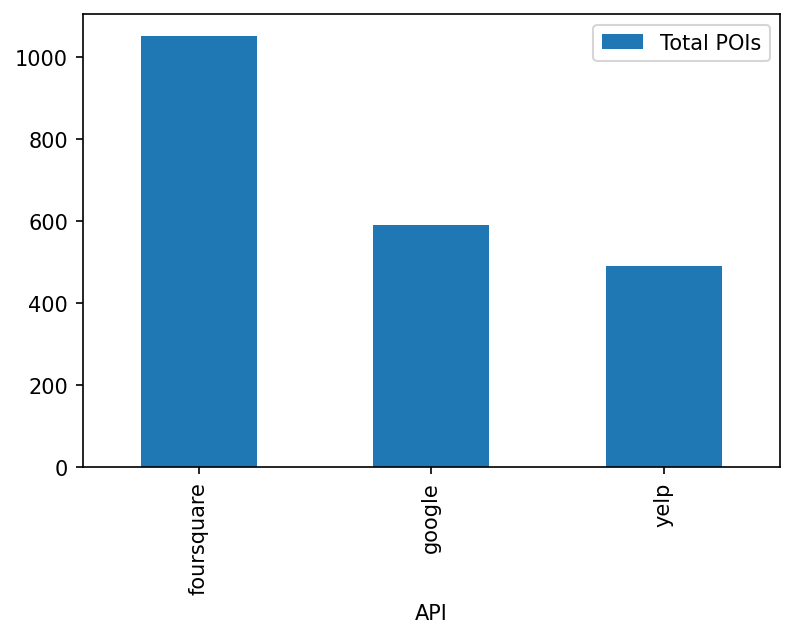

In [88]:
select_poi_info = """
SELECT api AS API, count(*) AS "Total POIs"
FROM poi_info
GROUP BY api;
"""
df = pd.read_sql_query(select_poi_info, connection)
ax = df.plot.bar('API')

In [31]:
df

,API,Total POIs
0,foursquare,1051
1,google,589
2,yelp,491


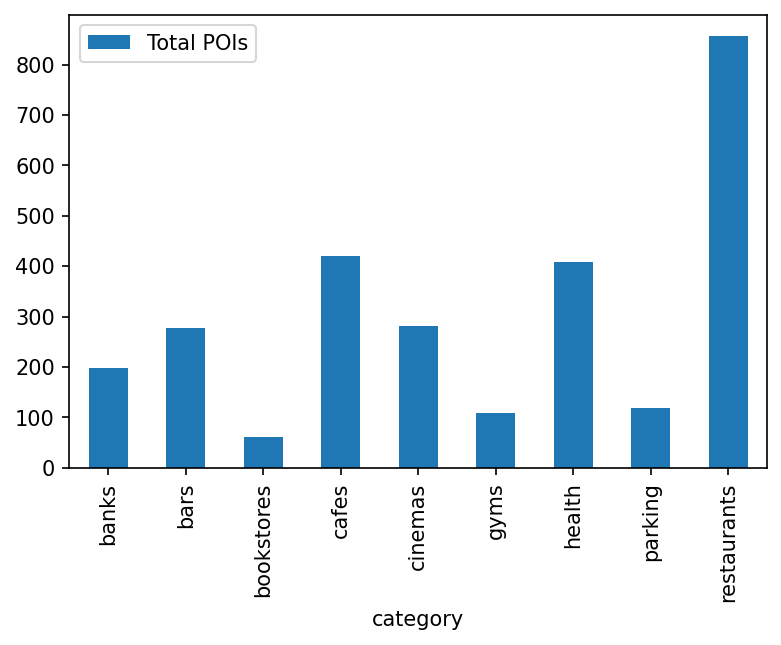

In [89]:
select_poi_info = """
SELECT category, count(*) AS "Total POIs"
FROM poi_category
GROUP BY category;
"""
df = pd.read_sql_query(select_poi_info, connection)
ax = df.plot.bar('category')

In [72]:
df

,category,Total POIs
0,banks,197
1,bars,277
2,bookstores,61
3,cafes,421
4,cinemas,281
5,gyms,108
6,health,408
7,parking,118
8,restaurants,856


In [77]:
select_poi_info = """
SELECT category, count(*) AS total_poi
FROM poi_category
WHERE api = 'foursquare'
GROUP BY category
ORDER BY category;
"""
df = pd.read_sql_query(select_poi_info, connection)
foursquare = df['total_poi']

In [78]:
select_poi_info = """
SELECT category, count(*) AS total_poi
FROM poi_category
WHERE api = 'yelp'
GROUP BY category
ORDER BY category;
"""
df = pd.read_sql_query(select_poi_info, connection)
yelp = df['total_poi']

In [79]:
select_poi_info = """
SELECT category, count(*) AS total_poi
FROM poi_category
WHERE api = 'google'
GROUP BY category
ORDER BY category;
"""
df = pd.read_sql_query(select_poi_info, connection)
google = df['total_poi']

In [80]:
select_poi_info = """
SELECT DISTINCT category
FROM poi_category
ORDER BY category;
"""
df = pd.read_sql_query(select_poi_info, connection)
index = df['category']

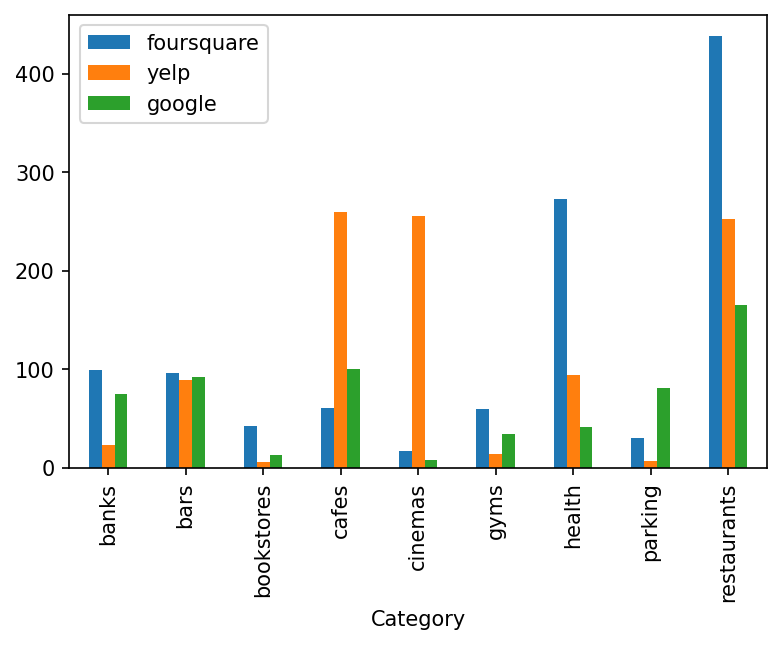

In [91]:
df = pd.DataFrame({'Category': index, 'foursquare': foursquare,'yelp': yelp,'google': google})
ax = df.plot.bar('Category')

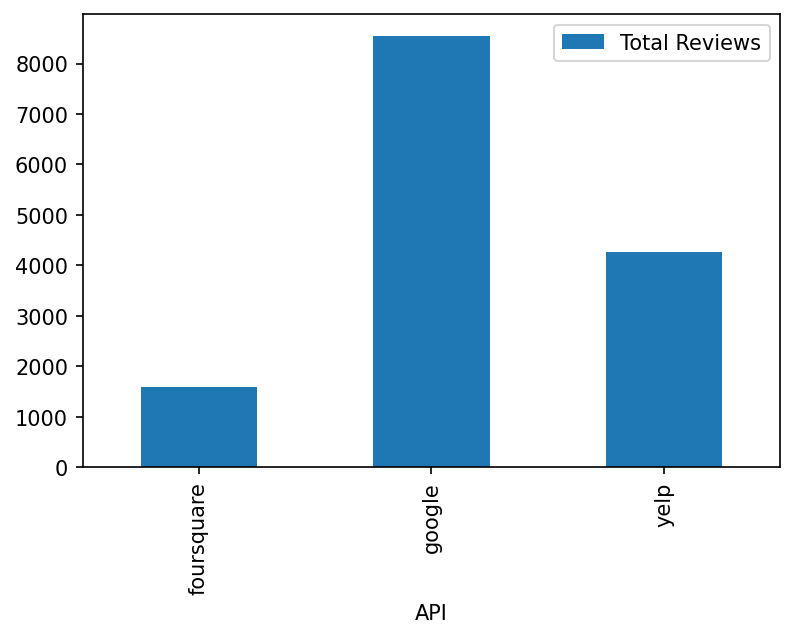

In [96]:
select_poi_info = """
SELECT api AS API, COUNT(*) AS "Total Reviews"
FROM poi_reviews
GROUP BY api;
"""
df = pd.read_sql_query(select_poi_info, connection)
ax = df.plot.bar('API')

In [97]:
df

,API,Total Reviews
0,foursquare,1585
1,google,8551
2,yelp,4271


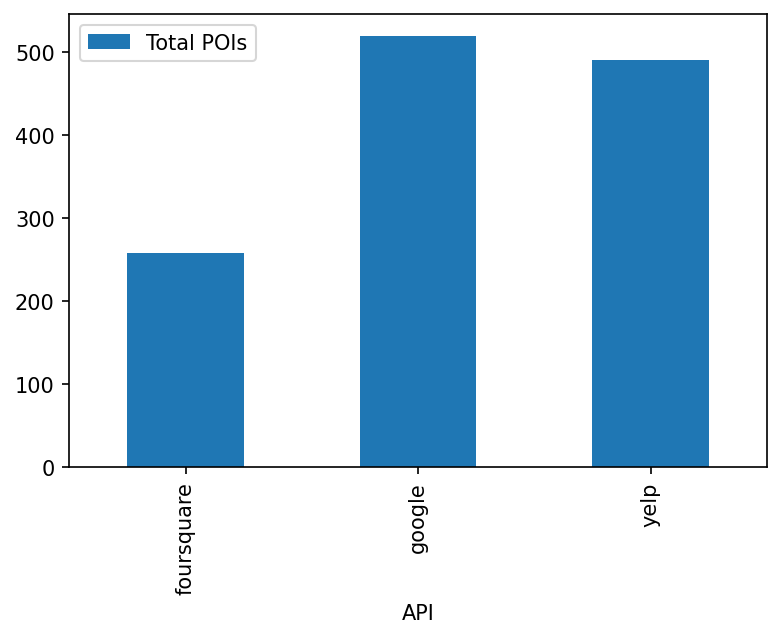

In [94]:
select_poi_info = """
SELECT api AS API, count(*) as "Total POIs"
FROM
(SELECT p.api, p.poi_id, count(*) as total_comment
FROM poi_info p, poi_reviews r
WHERE p.api = r.api AND p.poi_id = r.poi_id
GROUP BY p.api, p.poi_id)
GROUP BY api;
"""
df = pd.read_sql_query(select_poi_info, connection)
ax = df.plot.bar('API')

In [95]:
df

,API,Total POIs
0,foursquare,258
1,google,520
2,yelp,491


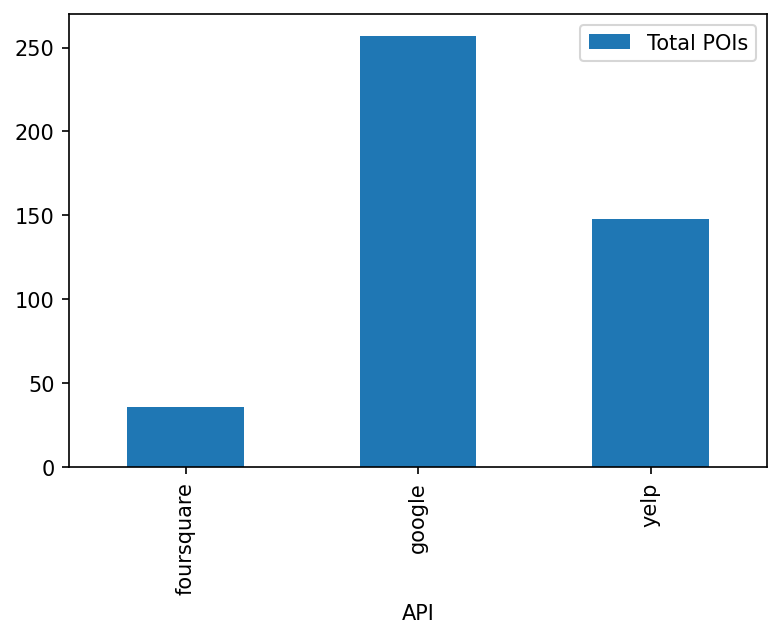

In [98]:
select_poi_info = """
SELECT api AS API, count(*) as "Total POIs"
FROM
(SELECT p.api, p.poi_id, count(*) as total_comment
FROM poi_info p, poi_reviews r
WHERE p.api = r.api AND p.poi_id = r.poi_id
GROUP BY p.api, p.poi_id)
WHERE total_comment > 10
GROUP BY api;
"""
df = pd.read_sql_query(select_poi_info, connection)
ax = df.plot.bar('API')

In [99]:
df

,API,Total POIs
0,foursquare,36
1,google,257
2,yelp,148
